# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [134]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [135]:
df = df.loc[df['dt'] >= '1950-01-01']

# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

In [50]:
df.loc[(df['dt'].dt.year == 1950) & (df['City'] == 'Toronto')].head(12)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
232164,1950-01-01,-3.037,0.278,Toronto,Canada,44.20N,80.50W
232165,1950-02-01,-7.750,0.168,Toronto,Canada,44.20N,80.50W
232166,1950-03-01,-5.624,0.234,Toronto,Canada,44.20N,80.50W
232167,1950-04-01,1.610,0.254,Toronto,Canada,44.20N,80.50W
232168,1950-05-01,11.563,0.380,Toronto,Canada,44.20N,80.50W
232169,1950-06-01,16.593,0.285,Toronto,Canada,44.20N,80.50W
232170,1950-07-01,18.161,0.227,Toronto,Canada,44.20N,80.50W
232171,1950-08-01,17.705,0.169,Toronto,Canada,44.20N,80.50W
232172,1950-09-01,13.377,0.138,Toronto,Canada,44.20N,80.50W
232173,1950-10-01,10.085,0.107,Toronto,Canada,44.20N,80.50W


<AxesSubplot: title={'center': 'Average Temperature in Toronto'}, xlabel='Year', ylabel='Average Temperature'>

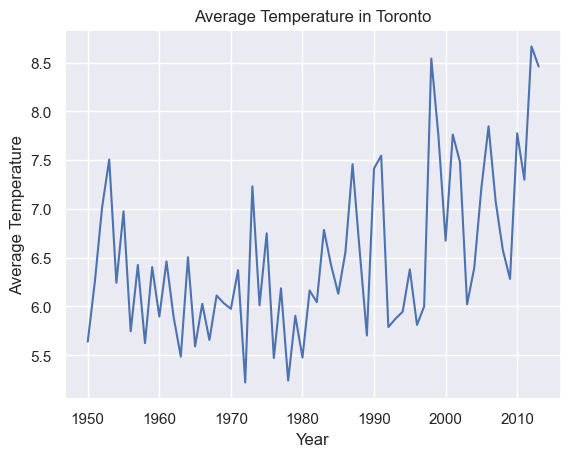

In [58]:
import seaborn as sns
sns.set()

df.loc[df['City'] == 'Toronto'].groupby([df['dt'].dt.year]).agg({'AverageTemperature' : 'mean'}).plot(xlabel='Year', 
                                                                                                        ylabel='Average Temperature', 
                                                                                                        title='Average Temperature in Toronto', 
                                                                                                        legend=False)

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [83]:
df.groupby(df['City']).agg({'AverageTemperature' : 'var'}).nlargest(columns='AverageTemperature', n=1).index[0]

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [141]:
import numpy as np

df['NumLatitude'] = pd.to_numeric(df['Latitude'].str[:-1]) * np.where(df['Latitude'].str[-1] == 'N', 1, -1)

In [174]:
df_4 = df.groupby(df['City']).agg({'AverageTemperature' : 'var', 'NumLatitude' : 'mean'})
df_4 = df_4.rename(columns = {'AverageTemperature':'VarTemperature'})
df_4['January75'] = df.loc[(df['dt'].dt.year == 1975) & (df['dt'].dt.month == 1)].set_index('City')['AverageTemperature']
df_4['July75'] = df.loc[(df['dt'].dt.year == 1975) & (df['dt'].dt.month == 7)].set_index('City')['AverageTemperature']
df_4 = df_4.set_index('NumLatitude').sort_index()
df_4

,VarTemperature,January75,July75
NumLatitude,,,
-37.78,16.174825,17.305,9.868
-34.56,4.531614,19.328,15.098
-32.95,9.192795,19.827,11.742
-32.95,22.691995,12.468,-1.101
-29.74,4.086368,22.529,17.711
...,...,...,...
50.63,91.873789,-0.440,20.142
52.24,24.957875,6.581,17.921
52.24,49.932928,5.252,19.986


<AxesSubplot: xlabel='NumLatitude'>

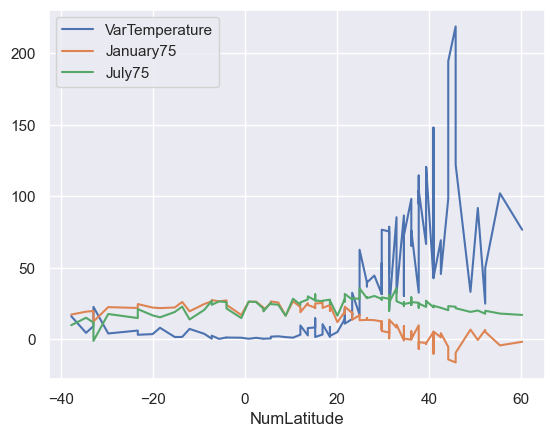

In [175]:
df_4.plot()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*